# Geo-spatial data creation

**The aim is to obtain Africa data from corona CSV and merge with World geojson**

Libraries are pandas and Geopandas

Pandas - for statistical analysis
Geopandas - for geospatial statistical

In [1]:
import pandas as pd

import geopandas as gpd

**we will use :**

1. confirmed corona cases from John Hopkins University GitHub repository

2. World geoJson shapefile

3. CSV file with continents name


In [2]:
confirmed = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

data_cont =  r'https://raw.githubusercontent.com/oderofrancis/rona/main/Countries-Continents.csv'

world = r'https://raw.githubusercontent.com/oderofrancis/africa-corona/main/world.geojson'

Reading all data using pandas and geopandas

In [3]:
confirmed = pd.read_csv(confirmed)

data_cont = pd.read_csv(data_cont)

world = gpd.read_file(world)

Data tables and columns

In [4]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22,4/26/22,4/27/22,4/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178513,178574,178611,178638,178648,178689,178745,178769,178809,178850
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,274535,274606,274606,274737,274791,274828,274828,274862,274929,275002
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265746,265746,265754,265761,265761,265767,265771,265772,265773,265776
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,40709,41013,41013,41013,41013,41013,41013,41013,41013,41349
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


In [5]:
data_cont.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina Faso


In [6]:
world.head()

,UN,NAME,LON,LAT,geometry
0,28,Antigua and Barbuda,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,12,Algeria,2.632,28.163,"MULTIPOLYGON (((2.96361 36.80222, 2.98139 36.8..."
2,31,Azerbaijan,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,8,Albania,20.068,41.143,"MULTIPOLYGON (((19.43621 41.02107, 19.45055 41..."
4,51,Armenia,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


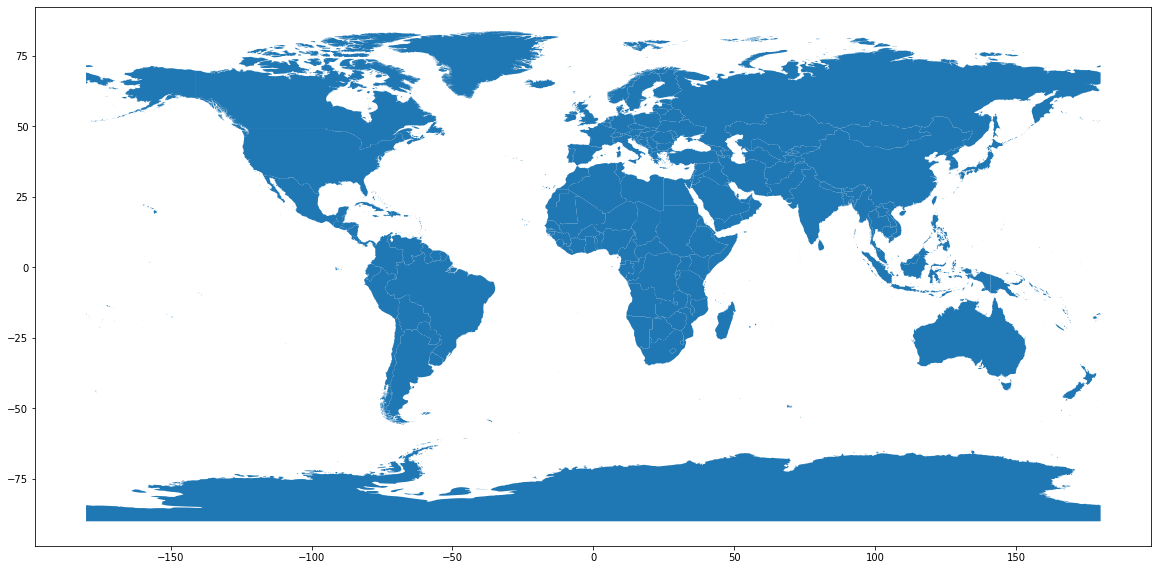

In [7]:
world.plot(figsize=(20,10))

# **Data analysis**

In [8]:
data_con = confirmed[['Country/Region',confirmed.columns[-1]]]

data_con.columns = ['country','confirmed']

data_cont.columns = ['continent','country']

world = world[['NAME', 'geometry']]

world.columns = ['country','geometry']

**Data merging**

In [9]:
data_con = pd.merge(left=data_cont, 
                right=data_con, how='left', 
                left_on='country', right_on='country'
            )

In [10]:
data_con.head()

,continent,country,confirmed
0,Africa,Algeria,265776.0
1,Africa,Angola,99287.0
2,Africa,Benin,26952.0
3,Africa,Botswana,305984.0
4,Africa,Burkina Faso,20865.0


**Data merging with geojson**

In [11]:
geo_data_con = pd.merge(left=data_con, 
                right=world, how='left', 
                left_on='country', right_on='country'
            )


geo_data_con = gpd.GeoDataFrame(geo_data_con)

In [12]:
geo_data_con.head()

,continent,country,confirmed,geometry
0,Africa,Algeria,265776.0,"MULTIPOLYGON (((2.96361 36.80222, 2.98139 36.8..."
1,Africa,Angola,99287.0,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -..."
2,Africa,Benin,26952.0,"MULTIPOLYGON (((2.48442 6.34049, 2.48000 6.338..."
3,Africa,Botswana,305984.0,"MULTIPOLYGON (((26.95919 -23.75208, 26.96331 -..."
4,Africa,Burkina Faso,20865.0,"MULTIPOLYGON (((-2.83405 11.00201, -2.83361 10..."


In [13]:
data_africa = geo_data_con[geo_data_con['continent'] == 'Africa']

In [14]:
data_africa.head()

,continent,country,confirmed,geometry
0,Africa,Algeria,265776.0,"MULTIPOLYGON (((2.96361 36.80222, 2.98139 36.8..."
1,Africa,Angola,99287.0,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -..."
2,Africa,Benin,26952.0,"MULTIPOLYGON (((2.48442 6.34049, 2.48000 6.338..."
3,Africa,Botswana,305984.0,"MULTIPOLYGON (((26.95919 -23.75208, 26.96331 -..."
4,Africa,Burkina Faso,20865.0,"MULTIPOLYGON (((-2.83405 11.00201, -2.83361 10..."


In [15]:
len(data_africa)

54

In [16]:
data_africa.sort_values(by='confirmed',ascending=False).head()

,continent,country,confirmed,geometry
44,Africa,South Africa,3780444.0,"MULTIPOLYGON (((37.85083 -46.95695, 37.84638 -..."
33,Africa,Morocco,1164865.0,"MULTIPOLYGON (((-9.05317 32.73480, -9.03500 32..."
50,Africa,Tunisia,1040193.0,"MULTIPOLYGON (((10.99361 33.75000, 10.93778 33..."
14,Africa,Egypt,515645.0,"MULTIPOLYGON (((34.00139 26.70722, 33.99667 26..."
27,Africa,Libya,501904.0,"MULTIPOLYGON (((9.94833 27.82444, 9.95417 27.8..."


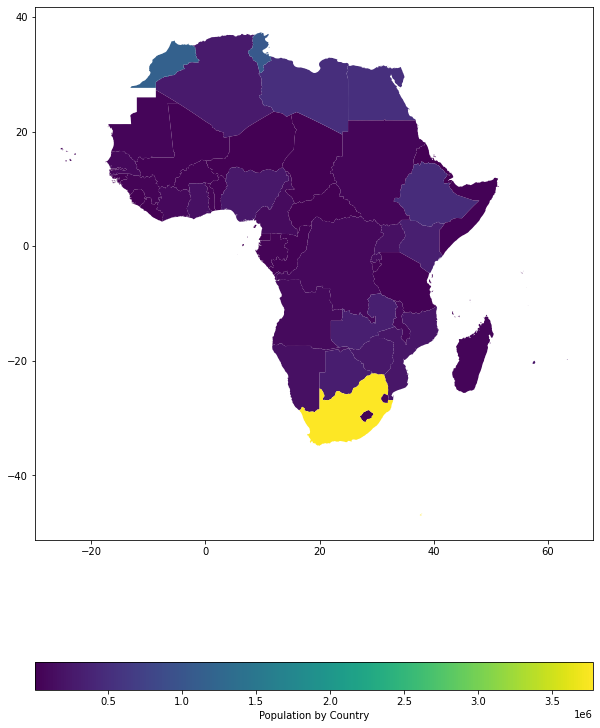

In [17]:
data_africa.plot(figsize=(10,15),column='confirmed',
                  legend=True,
                    legend_kwds={'label': "Population by Country",
                                 'orientation': "horizontal"}
                 )